# Mobile Price Classification Project

## Problem Statement

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price.

## Data

**link** to Kaggle: https://www.kaggle.com/iabhishekofficial/mobile-price-classification

## Project content:

1) Explorirary Data Analysis(EDA):

    a) Data Types of each column
    
    b) Missing Values
    
    c) Outliers
    
    d) Correlations
    
2) Data Preprocessing:

    a) Split on dependent and independent variables
    
    b) Normalization/standardization of the data
    
    c) Split on training and testing subsets
    
3) Baseline establishment

4) Comparision of the different non-tuned models

5) Hyperparameter tuning

6) Choosing the best model with the best set of parameters

7) Feature Importance

8) Prediction on the submission dataset

9) Single input prediction

10) Visualizing the predictions of the test set

11) Conclusion

In [29]:
# importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#turning off the warnings
import warnings
warnings.filterwarnings("ignore")

In [57]:
#importing the data
df = pd.read_csv("/Users/polyanaboss/Desktop/Machine Learning Datasets /Mobile Price Classification/train.csv")
submission = pd.read_csv("/Users/polyanaboss/Desktop/Machine Learning Datasets /Mobile Price Classification/test.csv")

In [3]:
#printing the shapes of the data
print(f"The train set shape: {df.shape}")
print(f"The test set shape: {submission.shape}")

The train set shape: (2000, 21)
The test set shape: (1000, 21)


From the cell above, equal number of columns might be seen, despite the fact that there is no target variable in the submission dataset. Let us identify the extra variable.

In [4]:
#train data columns
print(df.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [5]:
#test data columns
print(submission.columns)

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


Extra column is **id**, we will set it to column index afterwards, so that the order will not affect the prediction

In [6]:
# looking for the first rows of the data
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
# looking for the first rows of the data
submission.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [58]:
#reseting the index for the submission data
submission.set_index(submission["id"], drop = True, inplace = True)

In [10]:
#Get acquainted with the target variable, which is price range
df["price_range"].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

The data is balanced, having 4 classes with 500 observations per each class. 

## Data types of each column

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

There are no categorical variables in the dataset. All variables are integers or float values. Moreover, all values are non-null, i.e. **there are no missing values.**

# Outliers

The next important aspect to cover is outliers. They could damage the overall performance of the model ion the further analysis. Now we will find out the presence of outliers in our data.

In [13]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


From the table, outliers are not seen, the boxplots may help to catch them.

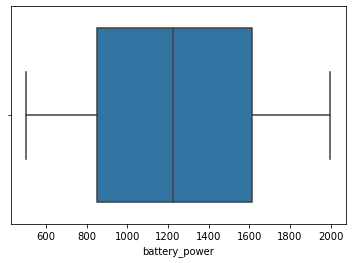

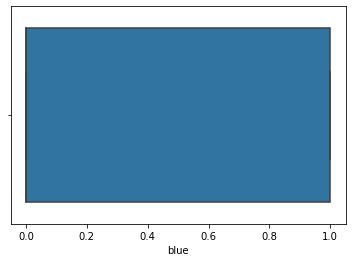

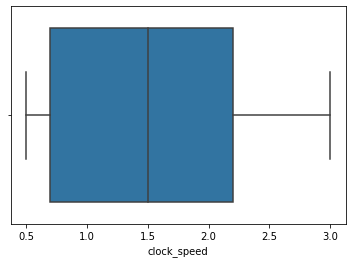

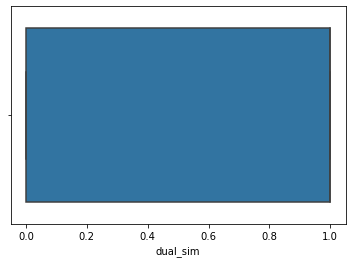

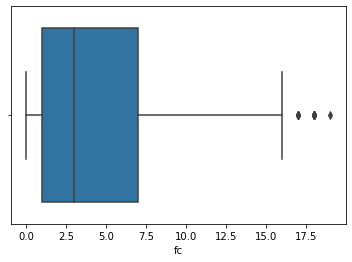

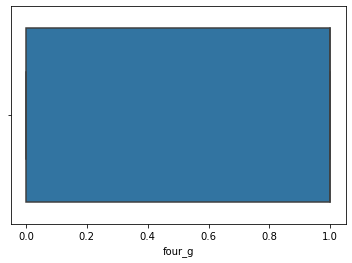

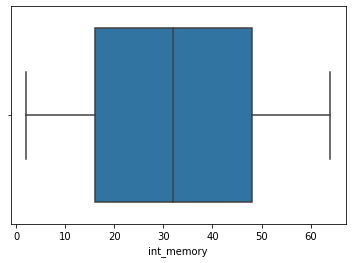

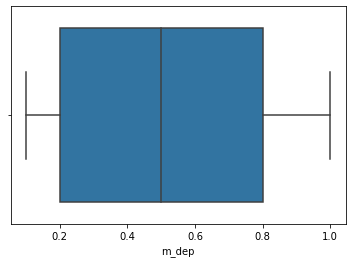

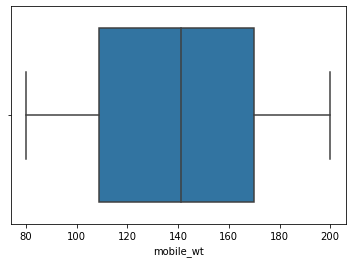

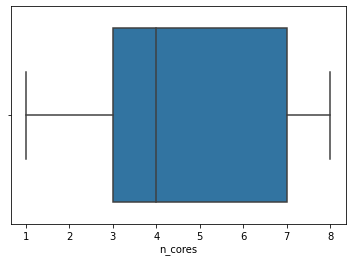

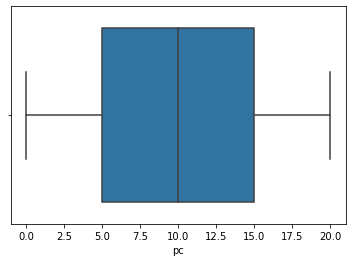

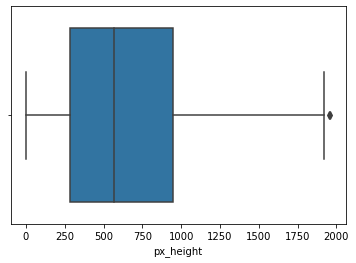

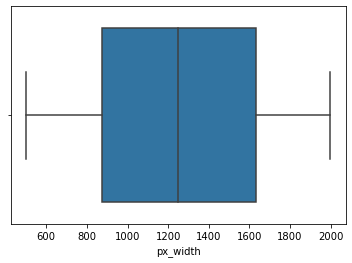

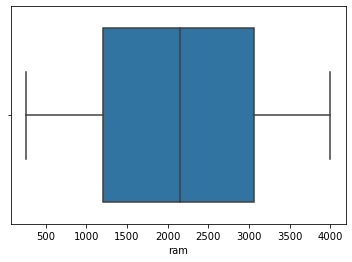

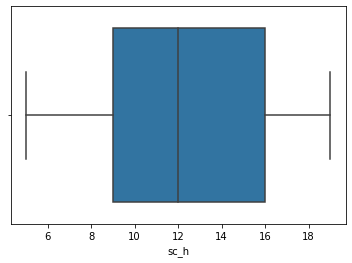

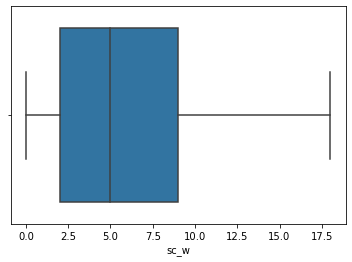

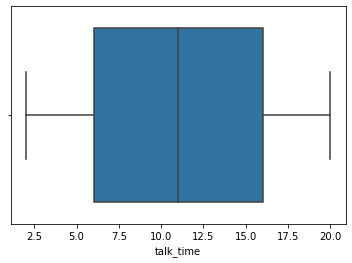

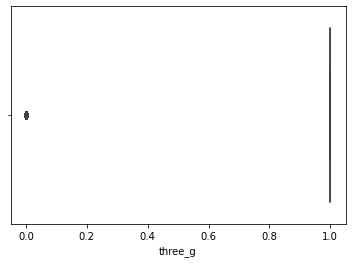

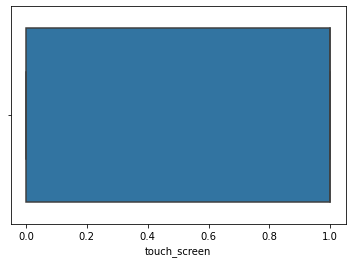

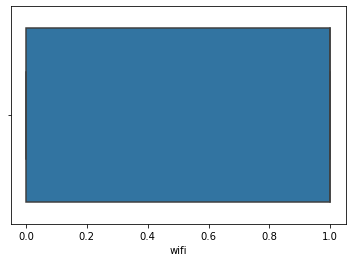

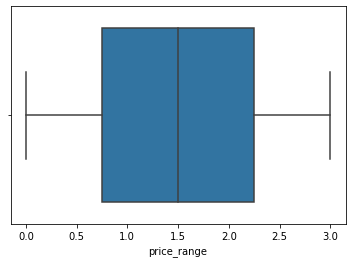

In [30]:
for column in df.columns.values:
    sns.boxplot(df[column])
    plt.show()

Boxplots show that the only column that might have the outliers is **fc**. Now we will invesrtigate this issue.

<AxesSubplot:xlabel='fc', ylabel='Count'>

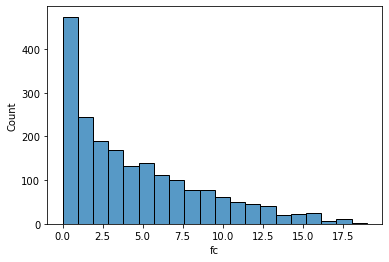

In [36]:
#plotting the distribution of the column
sns.histplot(df["fc"])

The distribution is rightly skewed and looks like lognormal one. We will find the interquartile range, which will be then multiplied by 1.5 and added to the mean value of the distribution.

In [37]:
IQR = df["fc"].quantile(0.75) - df["fc"].quantile(0.25)
upper_bound = df["fc"].mean() + 1.5 * IQR
upper_bound

13.3095

In [39]:
#how many observations lie to the right from critical value?
(df["fc"] > upper_bound).sum()

85

In [59]:
#these 85 values will be substituted by the upper bound
df["fc"] = np.where(df["fc"] > upper_bound, upper_bound, df["fc"])

# Correlations

There might be the case, when there are a lot of highly correlated variables, which can negatively affect the model performance. 

<AxesSubplot:>

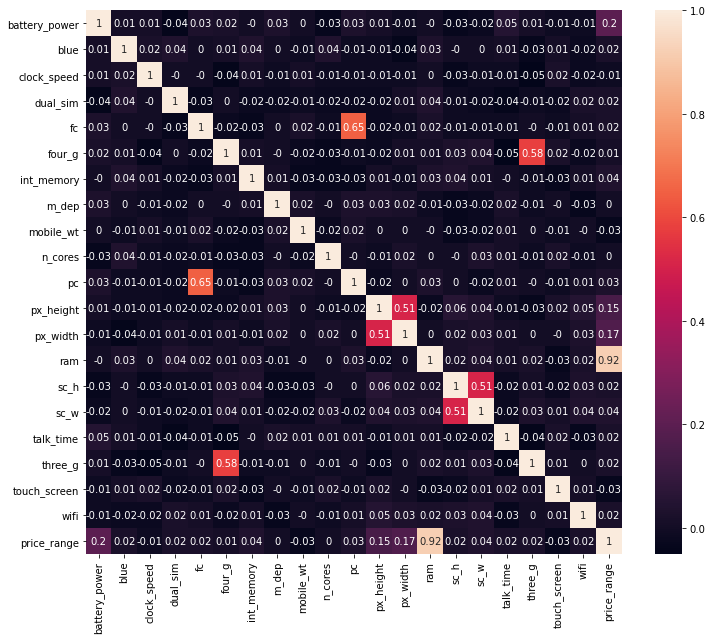

In [62]:
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr().round(2), annot = True)

Variables are not highly correlated. The only correlated pair is ram and price_range. Hence, there is no need to drop columns here.

# Relationship between phone features and its price range

In [53]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

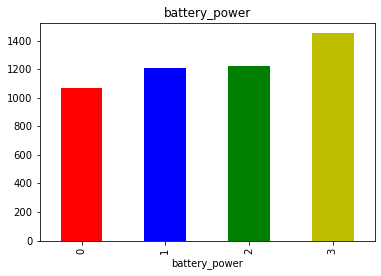

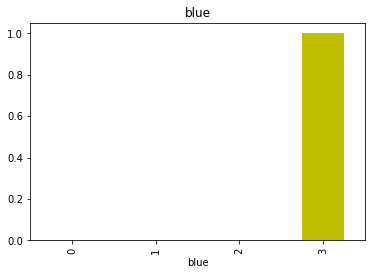

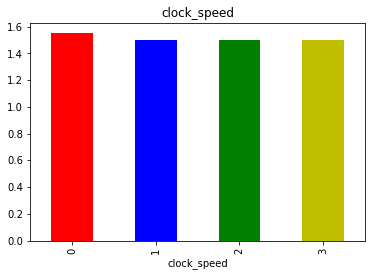

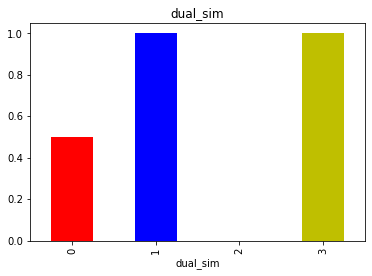

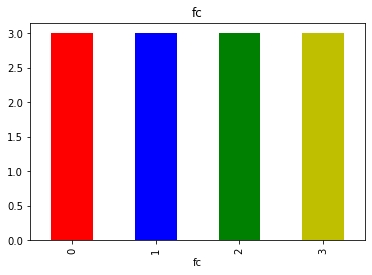

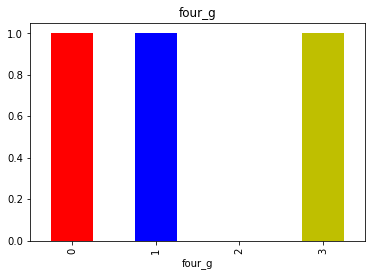

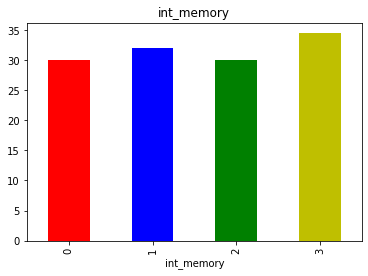

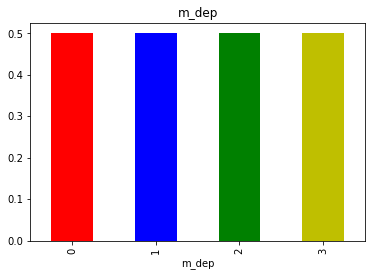

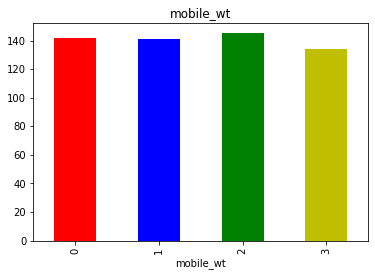

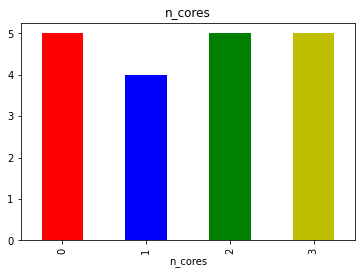

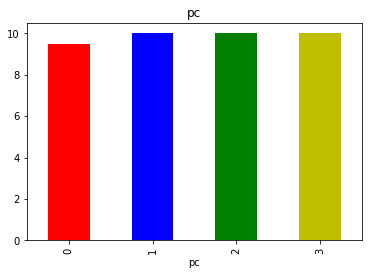

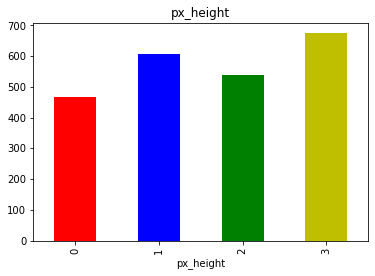

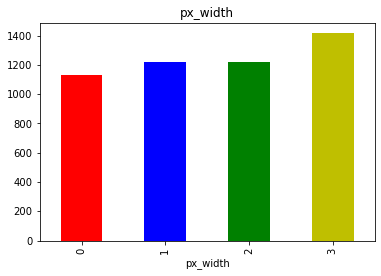

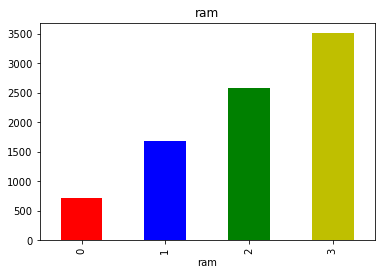

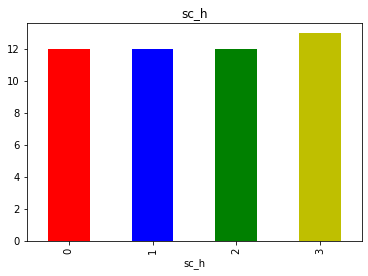

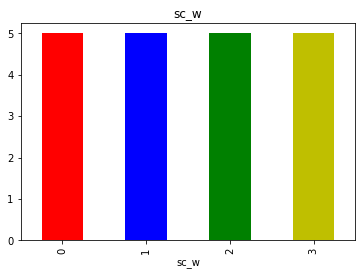

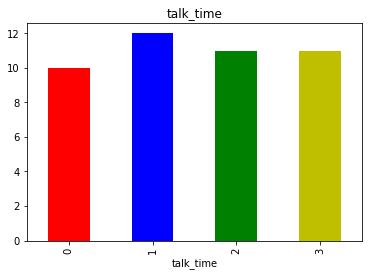

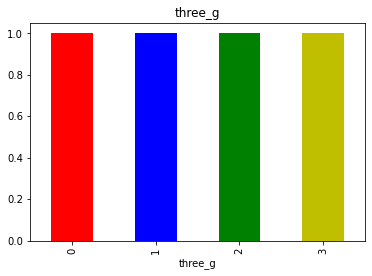

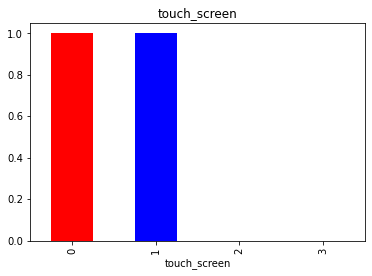

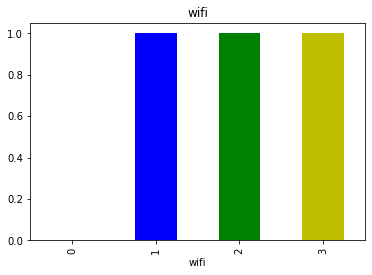

In [103]:
#plotting the median of each variable, grouping by the price range of the phone
for feature in df.columns[:-1]:
    data=df.copy()
    data.groupby("price_range")[feature].median().plot(kind = "bar", color = ["r", "b", "g", "y"])
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

### Relationships:

1) The more the  battery power, the higher the price range

2) all bluetooth phones are in the price range 3

3) There are no phones in the price range 2 with the dual sim-card and four-g

4) The more the  ram, the higher the price range

5) 0 price range has no phones with wi-fi

6) The rest variables did not show sufficient differences across the price ranges

# Data Preprocessing

Once we were introduced the data from several aspects, it is time to start the preprocessing phase

In [105]:
# splitting into the dependent and independent variables
X = df.drop("price_range", axis = 1)
y = df["price_range"]

It must be mentioned that there is no need to encode the target variable due to the presence of relationship between the label and the phone price: the higher the range, the higher the price. In other words, phone of range 0 is closer to the phone of range 1 rather than to the phone of range 3.

In [113]:
#splitting into the train and test set and checking its shape
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
print(X_train.shape)

(1600, 20)


Due to the absence of significant number of outliers, one can use Standard Scaler as a standardization tool.

In [114]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now the data is ready to be an input for the Machine Learning Algorithms. We are moving towards the baseline models.

## Baselines

Here we will make several non-tuned models, evaluate their performance and state, whether there is a room for impovement and further tuning.

In [115]:
#Support Vector Machine

from sklearn.svm import SVC

#instantiate the model

svm = SVC(random_state = 0)
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)

In [116]:
#importing the evaluation reports and metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [119]:
#defining the customized evaluation function
def score(predictions, actual_data):
    accuracy = accuracy_score(predictions, actual_data)
    confusion_mat = sns.heatmap(confusion_matrix(predictions, actual_data), annot = True)
    report = classification_report(predictions, actual_data)
    
    print(f"Accuracy score: {accuracy}")
    print(confusion_mat)
    print(report)

Accuracy score: 0.8975
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       100
           1       0.85      0.85      0.85       100
           2       0.88      0.85      0.87       103
           3       0.93      0.96      0.94        97

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



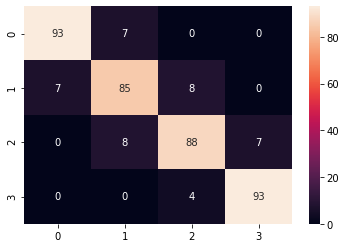

In [120]:
score(svm_pred, y_test)

In [122]:
# K-nearest neighbours

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

knn_pred = knn.predict(X_test_scaled)

Accuracy score: 0.48
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.76      0.58      0.66       130
           1       0.33      0.29      0.31       112
           2       0.37      0.38      0.37        98
           3       0.46      0.77      0.57        60

    accuracy                           0.48       400
   macro avg       0.48      0.51      0.48       400
weighted avg       0.50      0.48      0.48       400



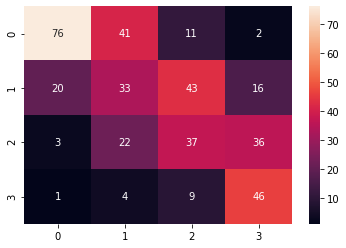

In [123]:
score(knn_pred, y_test)

In [124]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train_scaled, y_train)

rf_pred = rf.predict(X_test_scaled)

Accuracy score: 0.8825
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        99
           1       0.89      0.81      0.85       110
           2       0.80      0.87      0.83        92
           3       0.92      0.93      0.92        99

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



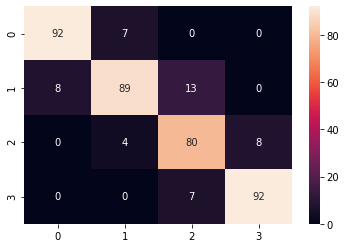

In [125]:
score(rf_pred, y_test)

3 different models were trained: SVM, Random Forest and KNN. The first 2 have shown good accuracy. There is no sence on tuning the KNN or exploring other classification techniques, because RF and SVM could provide us with excellent results after tuning as well. 

**The visualization of the results, interpretation and conclusions will be made once the best tuned model will be established.**

# HyperParameter tuning

Now it is time to tune the models(RF and SVM). I will use quite young tecnique in the machine learning field, which is Genetic Programming, particularly, TPOT model, which is  Automated Machine Learning tool that optimizes machine learning pipelines using genetic programming, will be used here.

In [131]:
#defining the range of possible values for each parameter for Random Forest

#Number of trees to be used in the forest
n_estimators = np.arange(200, 2600, 200)
#Maximum depth of the forest
max_depth = np.arange(10, 1000, 10)
#Minimum number of samples required to execute the split of the node
min_samples_split = np.arange(2, 20, 2)
#Minimum number of samples required to be at the single node
min_samples_leaf =  np.arange(1, 10, 1)
#Algorithm to use for the splitting
criterion = ["gini", "entropy"]
#Maximum number of features for the input
max_features = ["sqrt", "log2", "auto", None]

#converting parameters to the dictionary

forest_params = {"n_estimators" : n_estimators,
                 "max_depth" : max_depth,
                 "min_samples_split" : min_samples_split,
                 "min_samples_leaf" : min_samples_leaf,
                 "criterion" : criterion,
                 "max_features" : max_features}

print(forest_params)

{'n_estimators': array([ 200,  400,  600,  800, 1000, 1200, 1400, 1600, 1800, 2000, 2200,
       2400]), 'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990]), 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]), 'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2', 'auto', None]}


In [132]:
#defining the range of possible values for each parameter for Support Vector Machine

#C or regularization parameter that penalizes the losses
regularization = np.arange(0,1, 0.05)
#kernel function that transforms the data
kernel = ["linear", "poly", "rbf", "sigmoid", "precomputed"]
#Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid'
gamma = ["scale", "auto"]

#converting parameters to the dictionary

svm_params = {"C" : regularization,
              "kernel" : kernel,
             "gamma" : gamma}

print(svm_params)

{'C': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]), 'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'], 'gamma': ['scale', 'auto']}


In [133]:
#importing the TPOT library
from tpot import TPOTClassifier

In [135]:
#instantiate the model
tpot_classifier = TPOTClassifier(generations = 5,
                                population_size = 24, #number of the models
                                offspring_size = 12, #number of children to create
                                verbosity = 2, # to track the fitting
                                early_stop = 5, #number of pop-s without improvement in scoring
                                cv = 5, #cross-validation folds
                                random_state = 0,
                                config_dict = {'sklearn.ensemble.RandomForestClassifier' : forest_params,
                                'sklearn.svm.SVC' : svm_params}, #dictionary of model : parameters
                                scoring = "accuracy")

In [136]:
%%time

#fitting the optimizer model
tpot_classifier.fit(X_train_scaled, y_train)

Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9506249999999999

Generation 2 - Current best internal CV score: 0.9556250000000001

Generation 3 - Current best internal CV score: 0.9556250000000001

Generation 4 - Current best internal CV score: 0.9556250000000001

Generation 5 - Current best internal CV score: 0.9556250000000001

Best pipeline: SVC(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), C=0.6000000000000001, gamma=auto, kernel=linear)
CPU times: user 33min 19s, sys: 22.1 s, total: 33min 41s
Wall time: 34min 46s


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['gini',
                                                                                      'entropy'],
                                                                        'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 60...
                                                                        'n_estimators': array([ 200,  400,  600,  800, 1000, 1200, 1400, 1600, 1800, 2000, 2200,
       2400])},
                            'sklearn.svm.SVC': {'C': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                     

Once the model is tuned, one can see the best combination of the hyperparameters for our dataset: **Support Vector Machine with C = 0.6, gamma = auto and linear kernel.** Let us draw the reports on the predictions.

Accuracy score: 0.9675
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        99
           1       0.94      0.96      0.95        98
           2       0.98      0.94      0.96       104
           3       0.98      0.99      0.98        99

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



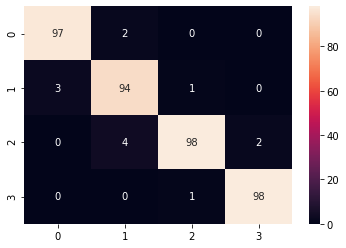

In [141]:
#view the scoring results
tpot_pred = tpot_classifier.predict(X_test_scaled)
score(tpot_pred, y_test)

Results provided above illustrate that the model is extremely accurate on the test set, having approximately 0.97 accuracy score. It can be also highlighted that model can easily distinguish non-neighbourhood classes, e.g. price range 1 and price range 3. The only confusions made are connected with neighbour classes.

## Feature importance

One more step to do here is to find the most significant variables in the model that are having great impact on the final prediction. 

The problem here is that TPOT library does not have attribute similar to sklearn's feature_importance_ that provides with the importance of each variable. Moreover, our best model is the Support Vector Machine, which does not have built-in attrubute. Hence, the solution will be to instantiate the SVM separetaly with the determined above hyperparameters. Then, thanks to the linear kernel, we can retrieve the coefficients through coefs_ attribute.

Accuracy score: 0.9575
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       103
           1       0.91      0.96      0.93        95
           2       0.96      0.94      0.95       102
           3       0.98      0.98      0.98       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



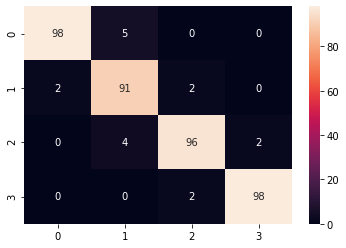

In [192]:
#instantiate the model
svm_fi = SVC(C=0.6000000000000001, gamma='auto', kernel='linear')
svm_fi.fit(X_train_scaled, y_train)
svm_fi_pred = svm_fi.predict(X_test_scaled)
#for safety, checking the correctness of the parameters by looking at the score function output
score(svm_fi_pred, y_test)

Text(0.5, 0, 'Importance index')

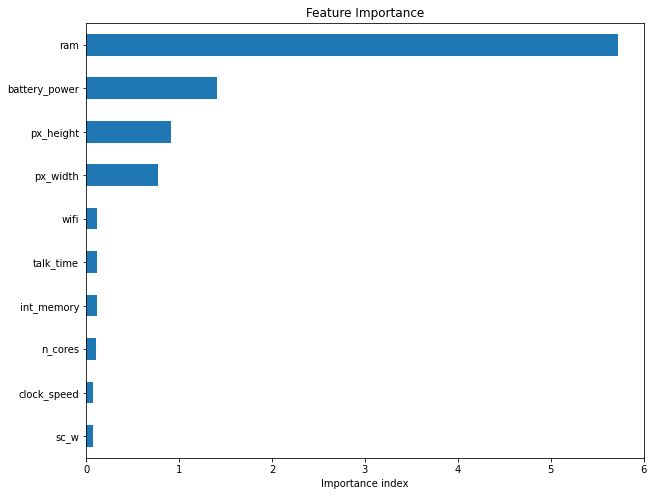

In [211]:
#taking 10 largest coefs and plotting the bar chart
plt.figure(figsize = (10,8))
pd.Series(abs(svm_fi.coef_[0]), index=X_train.columns).nlargest(10).sort_values().plot(kind = "barh")
plt.title("Feature Importance")
plt.xlabel("Importance index")

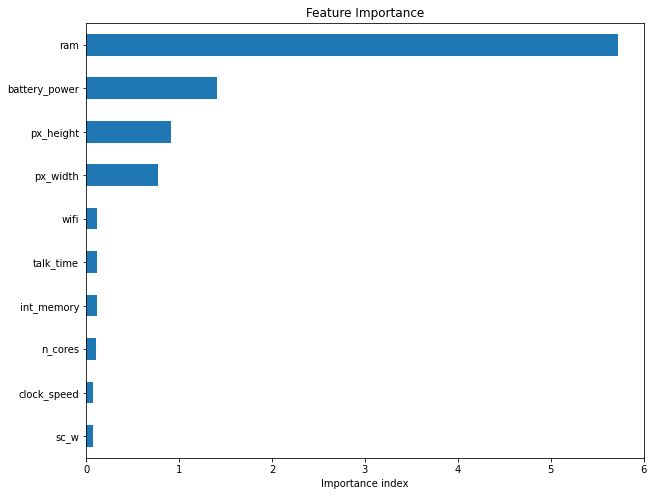

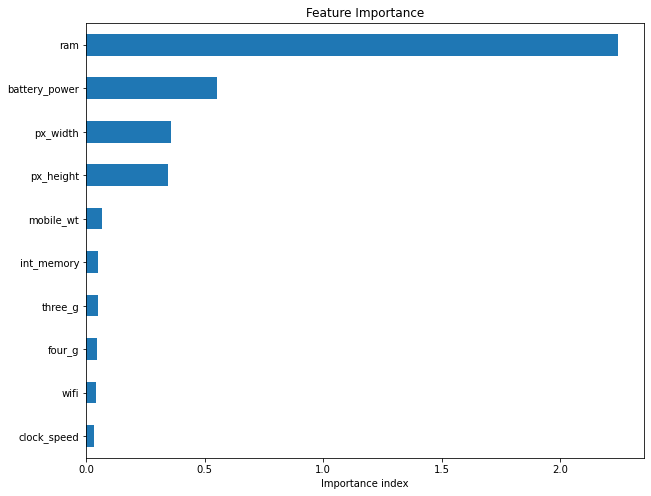

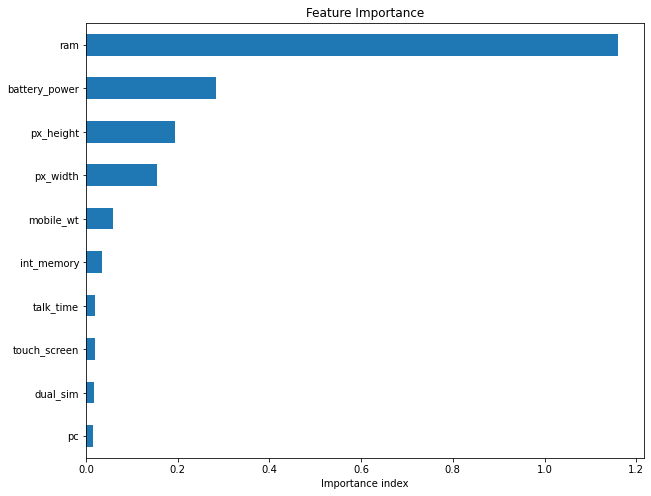

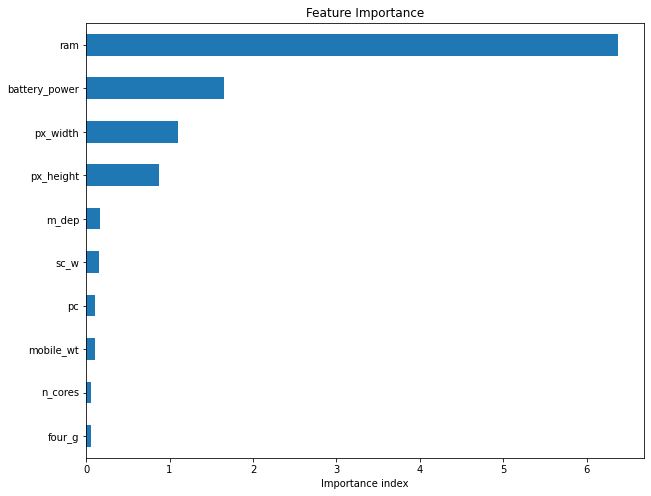

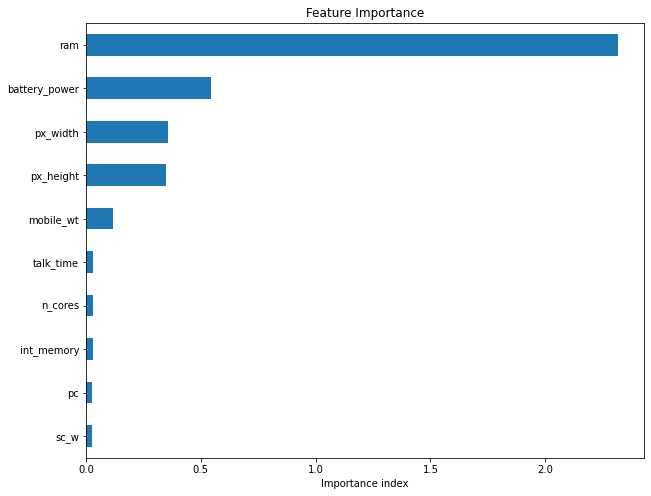

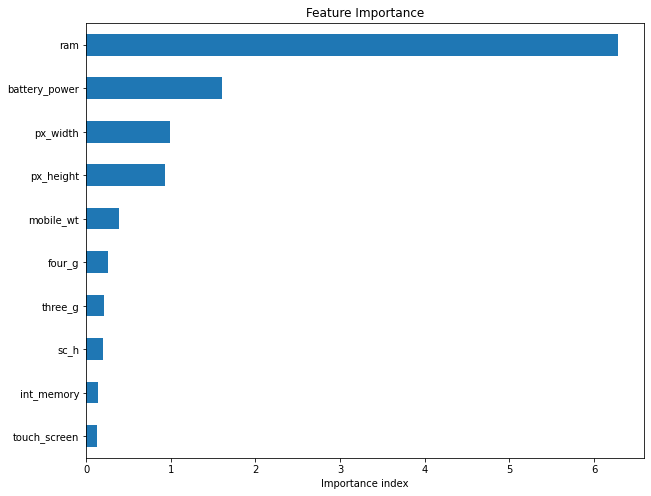

In [208]:
#we can also visualize it for every set of coefficients(in total, there are 6 of them)
for i in range(len(svm_fi.coef_)):
    plt.figure(figsize = (10,8))
    pd.Series(abs(svm_fi.coef_[i]), index=X_train.columns).nlargest(10).sort_values().plot(kind = "barh")
    plt.title("Feature Importance")
    plt.xlabel("Importance index")

**Conclusion:** The bar charts above show similar patterns. 

1) The only leader is RAM or Random Access Memory, which has index about 4 times larger then the 2nd position

2) In total, there are 4 main factors that affect the final prediction the most: RAM, battery power, height in pixels and width in pixels.

3) The rest part of top-10 features is not constant, however, their total impact is not significant on the price range forecast. 

We can also reminisce the concrete relationship between mentioned above variables and price range via graphs.

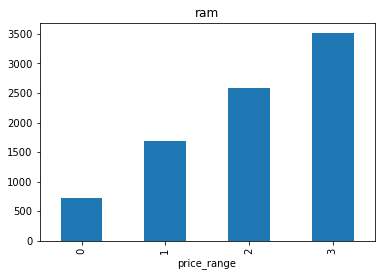

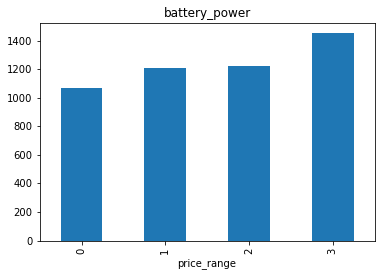

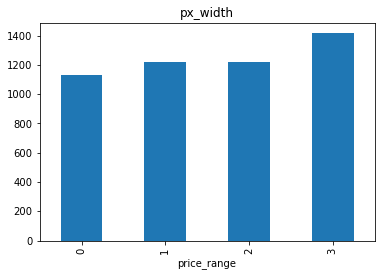

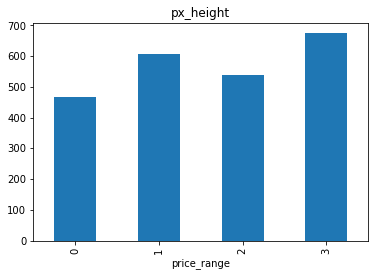

In [217]:
top_4 = ["ram", "battery_power", "px_width", "px_height"]
for column in top_4:
    df.groupby("price_range")[column].median().plot(kind = "bar")
    plt.title(column)
    plt.show()

RAM is the only variable that shows extremely visible relationship with the price range: the more the RAM, the higher the price range. Probably, that is the reason of such high importance for our final model.

## Submission dataset prediction

In [230]:
#predicting the price range for submission dataset, scaling the features and dropping id column beforehand 
submission_pred = tpot_classifier.predict(scaler.transform(submission.drop("id", axis = 1)))

In [233]:
#checking the correctness of the predictins
submission_pred[:10]

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0])

In [242]:
#converting the results to dataframe
ids = submission["id"]
final_submission = pd.DataFrame(submission_pred, ids, columns = ["prediction"])
final_submission

,prediction
id,
1,3
2,3
3,2
4,3
5,1
...,...
996,2
997,1
998,0


In [243]:
#saving final predictions to the csv file
final_submission.to_csv("mobile_price_range_submission.csv")

## Single Prediction

It is also possible to predict the price range for the single input. In this section, we will choose random values for each feature of the phone and predict its class.

In [253]:
#checking one more time the list of input features
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [254]:
#to get approximate knowledge of value range for each variable
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.211154,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.094464,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,13.309500,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [256]:
#values for each feature
battery_power = 1700
blue = 1
clock_speed = 2
dual_sim = 1
fc = 9
four_g = 1
int_memory = 50
m_dep = 1
mobile_wt = 140
n_cores = 5
pc = 13
px_height = 1700
px_width = 1500
ram = 3200
sc_h = 15
sc_w = 15
talk_time = 15
three_g = 1
touch_screen = 1
wifi = 1

In [259]:
#making the prediction
tpot_classifier.predict([[battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt,
                              n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen,
                              wifi]])

array([3])

The price range is predicted to be 3 for our single prediction.

# Visualizing the results

Now we will plot the test data, colored with the correspondent labels from prediction. For this, the dimensionality reduction have to be used. I will use the TSNE technique here.

In [260]:
#importing the TSNE object
from sklearn.manifold import TSNE

In [298]:
#fitting it 
tsne = TSNE(n_components = 2, perplexity=200,random_state = 0)
tsne_result = tsne.fit_transform(X_test)

<AxesSubplot:>

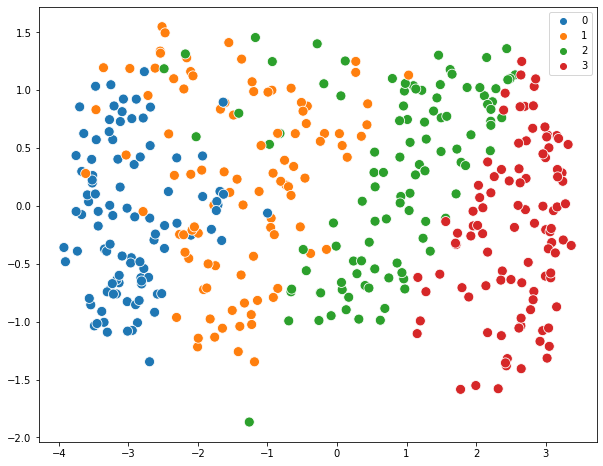

In [311]:
#plotting the result
plt.figure(figsize = (10,8))
sns.scatterplot(tsne_result[:, 0], y = tsne_result[:, 1], hue = tpot_pred, palette = "tab10", s = 100)

We see that our model can easily distinguish all the price ranges here. Moreover, it is seen here that the labels are located in the ascending order.

# Conclusion

The work is done, we have analyzed the dataset about the phone features and their price ranges. We have built and optimized the Support Vector Classifier with the final accuracy in the test set ~ 97%, which seems pretty good result.
Also, the concrete relationships between the feature and the price range were detected, as it was stated in the task. The model's feature importance shows that the most significant index is RAM. Furthermore, the battery power, height and width are important. 

# Post Scriptum

I have not covered the deployment stage yet but i will come up with it very soon and add it to this project.